In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

sys.path.append('..')

import numpy as np
from scipy import integrate

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc_file
rc_file('../matplotlibrc')

## 2. dt

In [2]:
import h5py
from astropy.cosmology import Planck18 as cosmo

sys.path.append('..')
from dm21cm.utils import load_h5_dict

In [3]:
! ls /n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/phot

cmbloss_rxneo.npy  hed_tf_rxneo.npy  ionhist_outputs   lep_tf_rxneo.npy
dt_rxneo.npy	   hep_tf_rxneo.npy  lee_tf_rxneo.npy  lowerbound_rxneo.npy


In [4]:
tf_dir = f"{os.environ['DM21CM_DATA_DIR']}/tf/230629"
with h5py.File(tf_dir + '/phot_scat.h5') as hf:
    data = hf['data'][()]

In [5]:
tf_dir = f"{os.environ['DM21CM_DATA_DIR']}/tf/zf01"
dts = np.load(tf_dir + '/phot/dt_rxneo.npy')

In [6]:
abscs = load_h5_dict("../data/abscissas/abscs_230629.h5")

In [7]:
def dt_rs(rs, dlnz):
    z_current = rs - 1
    z_next = np.exp(np.log(rs) - dlnz) - 1
    return ( cosmo.age(z_next) - cosmo.age(z_current) ).to('s').value

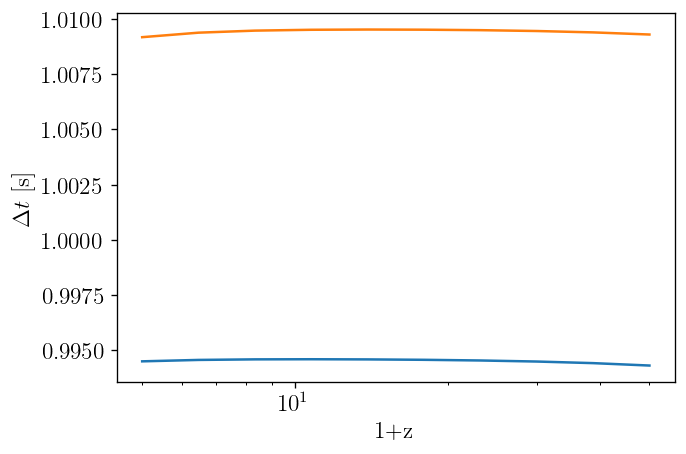

In [8]:
plt.plot(abscs['rs'], dt_rs(abscs['rs'], abscs['dlnz']) / dts[:,1])
plt.plot(abscs['rs'], dt_rs(abscs['rs'], abscs['dlnz']) / dts[:,0])
plt.xlabel('1+z')
plt.ylabel(r'$\Delta t$ [s]')
plt.xscale('log')

In [ ]:
tf_dir = f"{os.environ['DM21CM_DATA_DIR']}/tf/zf01"
with h5py.File(tf_dir + '/phot_scat.h5') as hf:
    data = hf['data'][()]

'/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data'

## 1. Cell crossing time
The average crossing length for a cube with length 1 is
$$\bar l=\frac{1}{4\pi}\int\mathrm{d}^2\hat n\frac{1}{|n_x|+|n_y|+|n_z|}=\frac{1}{\pi/2}\int_0^{\pi/2}\mathrm{d}\theta\int_0^{\pi/2}\mathrm{d}\phi\frac{\sin\theta}{\sin\theta\cos\phi+\sin\theta\sin\phi+\cos\theta}\approx0.6742$$

In [ ]:
sys.path.append(os.environ['DH_DIR'])
import darkhistory.physics as phys

In [3]:
def l_cross_integrand(th, ph):
    return np.sin(th)/(np.sin(th)*np.cos(ph)+np.sin(th)*np.sin(ph)+np.cos(th))
result, err = integrate.dblquad(l_cross_integrand, 0, np.pi/2, 0, np.pi/2)
l_cross_unit = result / (np.pi/2)

$$l_\text{phys}=a\cdot l_\text{cf}=\frac{1}{rs}~l_\text{cf}$$
$$\Delta t=\frac{\Delta\log(1+z)}{H(z)}$$

In [4]:
cell_cf_l = 1 * Mpc
dlnz = 0.001

In [5]:
rs_s = np.linspace(1, 50, 100)
DH21_dts = np.array([l_cross_unit * cell_cf_l / rs / Mpc for rs in rs_s])
DH_dts = np.array([dlnz / phys.hubble(rs) * phys.c / Mpc for rs in rs_s])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


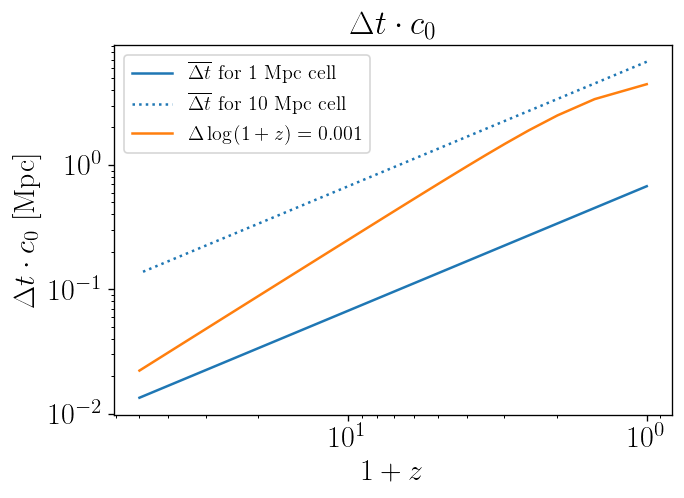

In [6]:
fig, ax = plt.subplots()
ax.plot(rs_s, DH21_dts, label=r'$\overline{\Delta t}$ for 1 Mpc cell')
ax.plot(rs_s, 10*DH21_dts, label=r'$\overline{\Delta t}$ for 10 Mpc cell', color='C0', linestyle=':')
ax.plot(rs_s, DH_dts, label=r'$\Delta\log(1+z)=0.001$')
ax.invert_xaxis()
ax.set(xlabel=r'$1+z$', ylabel=r'$\Delta t\cdot c_0$ [Mpc]', title=r'$\Delta t\cdot c_0$')
ax.set(xscale='log', yscale='log')
ax.legend(fontsize=12);